
# ChromaDB Explorer Notebook

This notebook provides an interactive way to explore your ChromaDB instance, inspect collections, view documents, and visualize embeddings.


In [2]:

import chromadb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np
import os

# --- Configuration ---
# Set the path to your ChromaDB persistent directory
# Make sure this path is correct relative to where you run the notebook
CHROMA_DB_PATH = "./chroma_db"

# Initialize ChromaDB client
client = chromadb.PersistentClient(path=CHROMA_DB_PATH)
print(f"ChromaDB client initialized, connected to: {CHROMA_DB_PATH}")


ChromaDB client initialized, connected to: ./chroma_db



## 1. List Collections

Run the cell below to see all available collections in your ChromaDB.


In [3]:

collections = client.list_collections()
if collections:
    print("Available Collections:")
    for i, collection in enumerate(collections):
        print(f"{i+1}. {collection.name}")
else:
    print("No collections found in the database.")


Available Collections:
1. research_agent_collection



## 2. Select a Collection and Inspect its Content

Enter the name of the collection you want to inspect. If you don't specify one, it will try to select the first available collection.


In [5]:

selected_collection_name = input("Enter collection name (or leave blank to select the first one): ").strip()

if not selected_collection_name and collections:
    selected_collection = collections[0]
    selected_collection_name = selected_collection.name
    print(f"No collection name entered, selecting the first one: {selected_collection_name}")
elif selected_collection_name:
    try:
        selected_collection = client.get_collection(name=selected_collection_name)
        print(f"Selected collection: {selected_collection_name}")
    except Exception as e:
        print(f"Error: Collection '{selected_collection_name}' not found. Please check the name and try again. {e}")
        selected_collection = None
else:
    print("No collections available to select.")
    selected_collection = None

if selected_collection:
    # Get all documents from the collection
    # Limit to a reasonable number for display to avoid overwhelming the notebook
    try:
        results = selected_collection.get(ids=None, where=None, limit=100, include=['documents', 'metadatas', 'embeddings'])
        
        documents = results['documents']
        metadatas = results['metadatas']
        embeddings = results['embeddings']
        ids = results['ids']

        print(f"Total documents in collection '{selected_collection_name}': {selected_collection.count()}")
        print(f"Displaying first {len(documents)} documents.")

        if documents:
            df = pd.DataFrame({
                'id': ids,
                'document': documents,
                'metadata': metadatas
            })
            print("Sample Documents:")
            display(df.head())

            print("Metadata Keys Distribution:")
            all_metadata_keys = []
            for meta in metadatas:
                if meta: # Ensure metadata is not None
                    all_metadata_keys.extend(meta.keys())
            if all_metadata_keys:
                metadata_key_counts = pd.Series(all_metadata_keys).value_counts()
                display(metadata_key_counts)
            else:
                print("No metadata found for these documents.")
        else:
            print("No documents found in the selected collection.")

    except Exception as e:
        print(f"Error retrieving documents from collection: {e}")
else:
    print("Cannot proceed without a selected collection.")


No collection name entered, selecting the first one: research_agent_collection
Total documents in collection 'research_agent_collection': 1644
Displaying first 100 documents.
Sample Documents:


,id,document,metadata
0,9272bf3f-ba44-4300-b04c-dc42d9d6112c,The Future of AI in Medicine\n\nThis document ...,{'source': 'documents/sample_document.md'}
1,3bc7f30a-495e-4896-92f3-f8bbb8f44ec8,The Future of AI in Medicine\n\nThis document ...,{'source': 'documents/sample_document.md'}
2,2511fc73-a0e2-4e3c-a48c-55d55a0efcac,"See discussions, stats, and author profiles fo...",{'source': 'documents/Enhancing Ontologies wit...
3,0e2ed67d-a34a-408b-b22a-05f36b7595c0,Enhancing Ontologies with Large Language Model...,{'source': 'documents/Enhancing Ontologies wit...
4,83aad2a8-b487-4a5b-8c7e-7da26e21b486,"In medicine and biology, ontologies standardiz...",{'source': 'documents/Enhancing Ontologies wit...


Metadata Keys Distribution:


source    100
Name: count, dtype: int64


## 3. Visualize Embeddings (if available)

If your documents have embeddings, this section will attempt to reduce their dimensionality using PCA and t-SNE for visualization. This helps to see clusters or relationships between your document chunks.


Found 100 embeddings with dimension 768.
Applying PCA for dimensionality reduction...


/Users/ikmx/source/personal/test-smith/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12434 (\N{HIRAGANA LETTER WO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ikmx/source/personal/test-smith/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 22240 (\N{CJK UNIFIED IDEOGRAPH-56E0}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ikmx/source/personal/test-smith/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26524 (\N{CJK UNIFIED IDEOGRAPH-679C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ikmx/source/personal/test-smith/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25512 (\N{CJK UNIFIED IDEOGRAPH-63A8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ikmx/source/personal/test-smith/.venv/lib/pyt

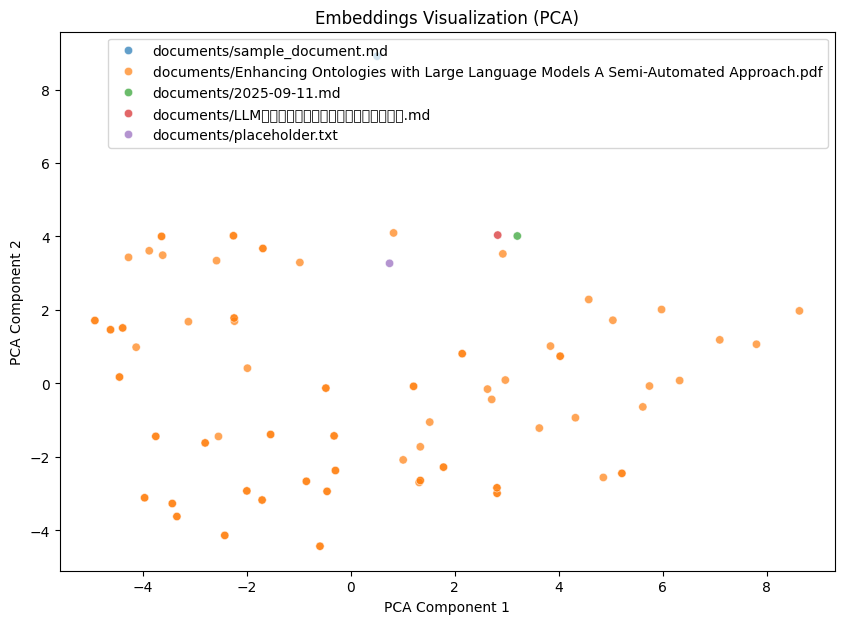

Applying t-SNE for dimensionality reduction (this may take a moment)...


/Users/ikmx/source/personal/test-smith/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12434 (\N{HIRAGANA LETTER WO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ikmx/source/personal/test-smith/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 22240 (\N{CJK UNIFIED IDEOGRAPH-56E0}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ikmx/source/personal/test-smith/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26524 (\N{CJK UNIFIED IDEOGRAPH-679C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ikmx/source/personal/test-smith/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25512 (\N{CJK UNIFIED IDEOGRAPH-63A8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ikmx/source/personal/test-smith/.venv/lib/pyt

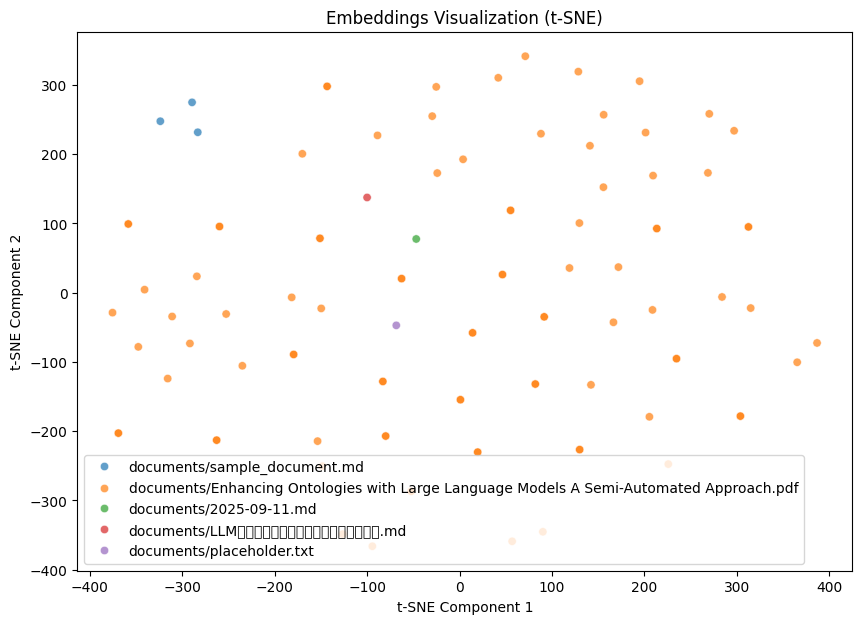

In [10]:
if 'embeddings' in locals() and embeddings is not None and len(embeddings) > 1: 
    print(f"Found {len(embeddings)} embeddings with dimension {len(embeddings[0])}.")
    embeddings_array = np.array(embeddings)

    # Reduce dimensionality for visualization
    if embeddings_array.shape[1] > 2:
        print("Applying PCA for dimensionality reduction...")
        pca = PCA(n_components=2)
        pca_result = pca.fit_transform(embeddings_array)
        
        plt.figure(figsize=(10, 7))
        sns.scatterplot(
            x=pca_result[:,0], y=pca_result[:,1],
            hue=[m.get('source', 'unknown') if m else 'unknown' for m in metadatas], # Color by 'source' if available
            legend='full',
            alpha=0.7
        )
        plt.title('Embeddings Visualization (PCA)')
        plt.xlabel('PCA Component 1')
        plt.ylabel('PCA Component 2')
        plt.show()

        # t-SNE for potentially better clustering visualization (can be slow for many points)
        if len(embeddings) < 1000: # Limit t-SNE for performance
            print("Applying t-SNE for dimensionality reduction (this may take a moment)...")
            tsne = TSNE(n_components=2, random_state=42, perplexity=min(30, len(embeddings)-1))
            tsne_result = tsne.fit_transform(embeddings_array)

            plt.figure(figsize=(10, 7))
            sns.scatterplot(
                x=tsne_result[:,0], y=tsne_result[:,1],
                hue=[m.get('source', 'unknown') if m else 'unknown' for m in metadatas], # Color by 'source' if available
                legend='full',
                alpha=0.7
            )
            plt.title('Embeddings Visualization (t-SNE)')
            plt.xlabel('t-SNE Component 1')
            plt.ylabel('t-SNE Component 2')
            plt.show()
        else:
            print("Skipping t-SNE for performance reasons (too many embeddings).")
    else:
        print("Embeddings dimension is 2 or less, no reduction needed for visualization.")
        plt.figure(figsize=(10, 7))
        sns.scatterplot(
            x=embeddings_array[:,0], y=embeddings_array[:,1],
            hue=[m.get('source', 'unknown') if m else 'unknown' for m in metadatas], # Color by 'source' if available
            legend='full',
            alpha=0.7
        )
        plt.title('Embeddings Visualization (Original 2D)')
        plt.xlabel('Embedding Dimension 1')
        plt.ylabel('Embedding Dimension 2')
        plt.show()
else:
    print("No embeddings available or not enough embeddings to visualize for the selected collection.")



## 4. Search within a Collection (Optional)

You can perform a similarity search within the selected collection. Enter a query text and specify how many results you want.


In [8]:

if 'selected_collection' in locals() and selected_collection:
    query_text = input("Enter a query to search within the collection (or leave blank to skip): ").strip()
    if query_text:
        try:
            n_results_str = input("How many results to retrieve? (default: 5): ").strip()
            n_results = int(n_results_str) if n_results_str.isdigit() else 5

            search_results = selected_collection.query(
                query_texts=[query_text],
                n_results=n_results,
                include=['documents', 'metadatas', 'distances']
            )

            print(f"Search Results for '{query_text}':")
            if search_results['documents'] and search_results['documents'][0]:
                search_df = pd.DataFrame({
                    'document': search_results['documents'][0],
                    'metadata': search_results['metadatas'][0],
                    'distance': search_results['distances'][0]
                })
                display(search_df)
            else:
                print("No results found for your query.")
        except Exception as e:
            print(f"Error during search: {e}")
    else:
        print("Query text was empty, skipping search.")
else:
    print("Cannot perform search without a selected collection.")


Query text was empty, skipping search.
